# The Hydrogen Atom

#### Kemal Önen, Liedl Lab, University of Innsbruck

### Note 1: Probability as a function of radial distance goes like $r^2 R(r)$

### Note 2: The real part of the spherical harmonics will be used which is physically identical to imaginary counterparts

### Note 3: In what follows we will adopt atomic units $a_0 = 1, \hbar = 1, m_e = 1, e=1$

In [28]:
pip install ipywidgets

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Import special functions 
import scipy.special as spe
from matplotlib import cm

## Radial part

$R_{n,l}(r) = \sqrt{\left(\dfrac{2}{na_0}\right)^3\dfrac{(n-l-1)!}{2n(n+l)!}}e^{-r/na_0} \left(\dfrac{2r}{na_0} \right)^l \cdot L_{2l+1}^{n-l-1} \left(\dfrac{2r}{na_0} \right)$ 

In [20]:
def Psi_R(r,n,l):

    coeff = np.sqrt((2.0/n)**3 * spe.factorial(n-l-1) /(2.0*n*spe.factorial(n+l)))
    
    laguerre = spe.assoc_laguerre(r,n-l-1,2*l+1)
    
    return coeff * np.exp(-r/n) * (2.0*r/n)**l * laguerre * (2.0*r/n)

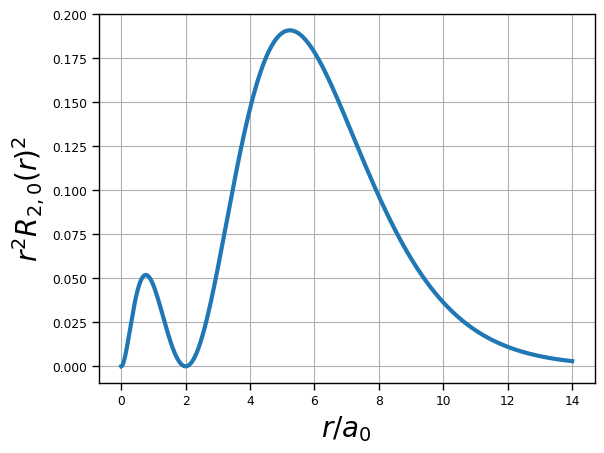

In [21]:
sns.set_context("paper")

r = np.linspace(0,14,1000)

R = Psi_R(r,n=2,l=0)

plt.plot(r, R**2, lw=3)

plt.xlabel('$r / a_0$',fontsize=20)

plt.ylabel('$r^2 R_{2,0}(r)^2$', fontsize=20)

plt.grid('True')

plt.savefig("R_{2,0}(r)^2.png", dpi = 500)

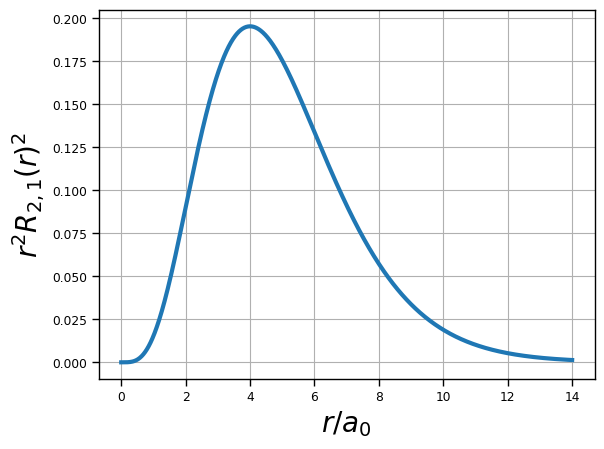

In [22]:
sns.set_context("paper")

r = np.linspace(0,14,1000)

R = Psi_R(r,n=2,l=1)

plt.plot(r, R**2, lw=3)

plt.xlabel('$r / a_0$',fontsize=20)

plt.ylabel('$r^2 R_{2,1}(r)^2$', fontsize=20)

plt.grid('True')

plt.savefig("R_{2,1}(r)^2.png", dpi = 500)

## Angular part

$Y_{l,m}(\theta, \phi) = \sqrt{\dfrac{2l+1}{4\pi}\dfrac{(l-m)!}{(l+m)!}} P_{l,m}\cos{(\theta)} \cdot e^{im\phi} $

In [10]:
def psi_ang(phi,theta,l=0,m=0):
    
    sphHarm = spe.sph_harm(m,l,phi,theta)

    return sphHarm.real

In [45]:
phi, theta = np.linspace(0, np.pi, 100), np.linspace(0, 2*np.pi, 100)

phi, theta = np.meshgrid(phi, theta)

Ylm = psi_ang(theta,phi,l=1,m=1)


In [46]:
x = np.sin(phi) * np.cos(theta) * abs(Ylm)
y = np.sin(phi) * np.sin(theta) * abs(Ylm)
z = np.cos(phi) * abs(Ylm)

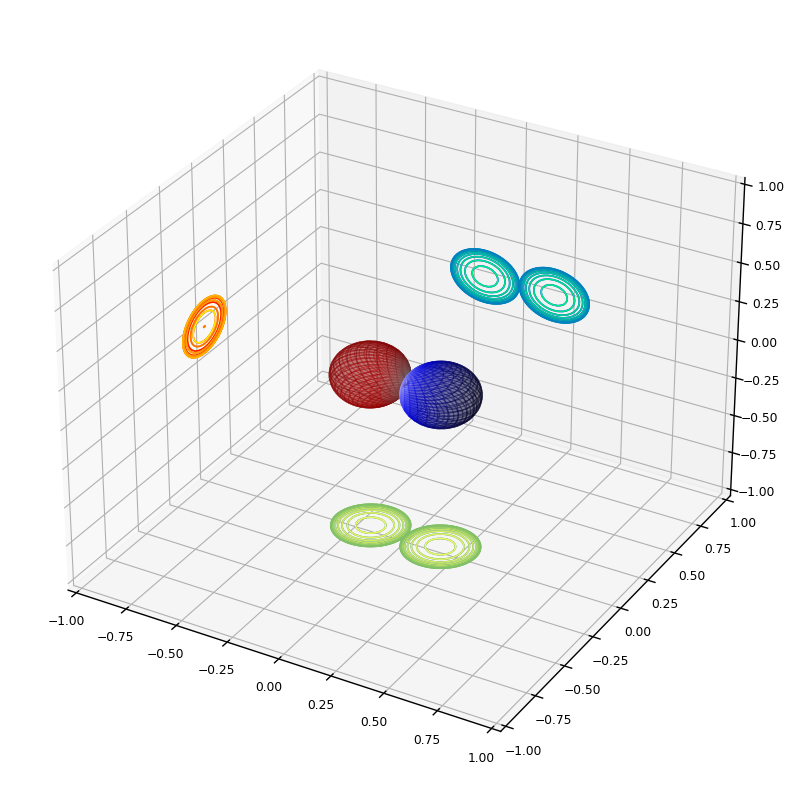

In [47]:
'''Set up the 3D Canvas'''

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

''' Normalize color bar to [0,1] scale'''

fcolors = (Ylm - Ylm.min())/(Ylm.max() - Ylm.min())

'''Make 3D plot of real part of spherical harmonic'''

ax.plot_surface(x, y, z, facecolors=cm.seismic(fcolors), alpha=0.3)


''' Project 3D plot onto 2D planes'''

cset = ax.contour(x, y, z,20, zdir='z',offset = -1, cmap='summer')
cset = ax.contour(x, y, z,20, zdir='y',offset =  1, cmap='winter' )
cset = ax.contour(x, y, z,20, zdir='x',offset = -1, cmap='autumn')


''' Set axes limit to keep aspect ratio 1:1:1 '''

ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)

plt.savefig("Y_1_1.png", dpi=500)